In [70]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [79]:
stock_file = '/Users/fanxinwei/Desktop/code/git_repo/dsmp-2024-group20/ARIMA/avg_data.csv'
df = pd.read_csv(stock_file)
df.head(10)

,date,avg_value
0,2025-01-02,280.835195
1,2025-01-03,295.934520
2,2025-01-06,311.477846
3,2025-01-07,356.110860
4,2025-01-08,335.463905
5,2025-01-09,330.244346
6,2025-01-10,313.214255
7,2025-01-13,313.815349
8,2025-01-14,335.924303
9,2025-01-15,322.712487


In [80]:
# 将日期列转换为Datetime类型并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 确认时间序列频率为每日数据
# 如果不是每日数据，请根据实际情况调整频率，例如'W'代表每周，'M'代表每月等
df = df.asfreq('D')


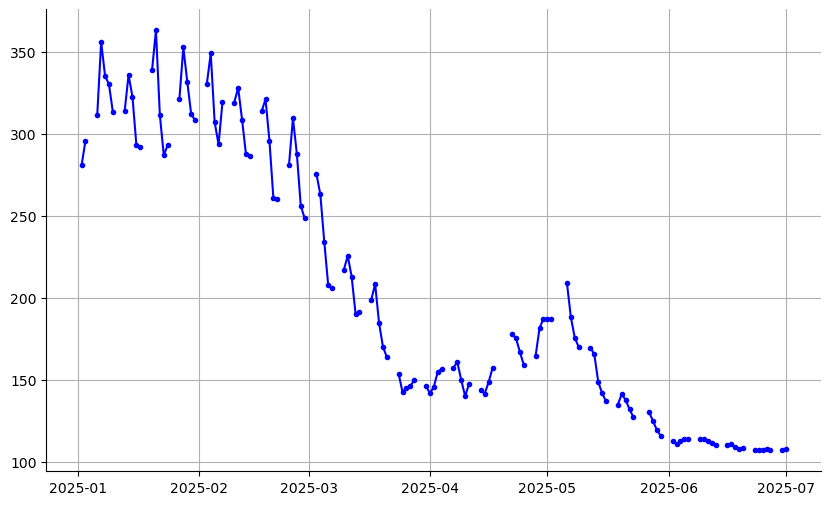

In [86]:
price = df['avg_value']
plt.figure(figsize=(10, 6))
plt.plot(price, marker='.', linestyle='-', color='b')
plt.grid(True)
sns.despine()

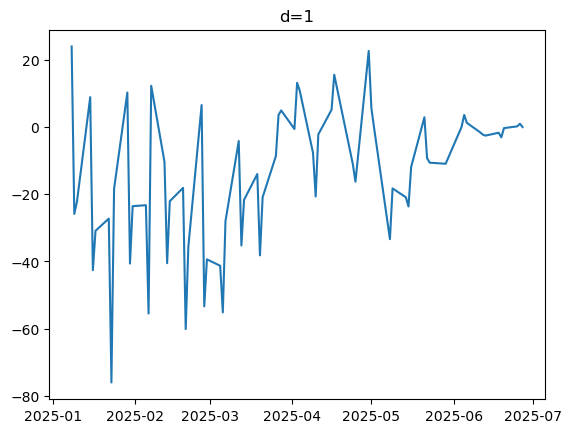

In [97]:
price_diff = price.diff(2)
price_diff = price_diff.dropna()
plt.figure()
plt.plot(price_diff)
plt.title('d=1')
plt.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_32734/1499243060.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


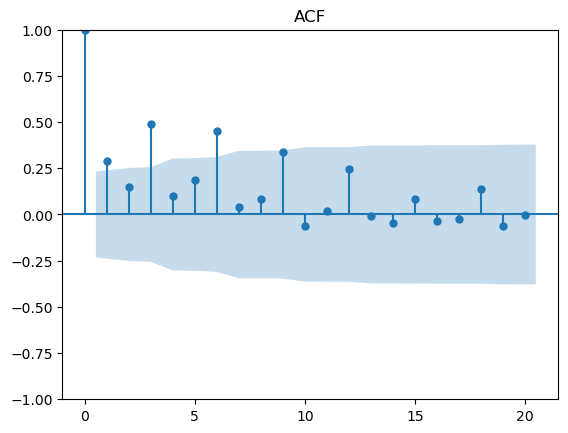

In [98]:
acf = plot_acf(price_diff, lags=20)
plt.title("ACF")
acf.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_32734/3766438781.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


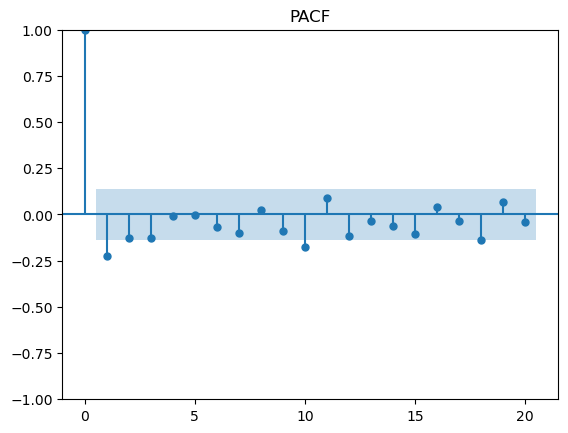

In [67]:
pacf = plot_pacf(price_diff, lags=20)
plt.title("PACF")
pacf.show()

In [72]:
model = ARIMA(price_diff, order=(2, 1, 2))

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
result = model.fit()

In [74]:
pred = result.predict('190', '210', dynamic=True, typ='levels')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'